In [1]:
import pandas as pd
import os


In [2]:
filenames = os.listdir(os.getcwd())
csv_filenames = [f for f in filenames if f.endswith('csv')]

In [3]:
csv_filenames

['g60_conductive_3.csv',
 'g60_conductive_4.csv',
 'g60_conductive_5.csv',
 'g60_nonconductive_1.csv',
 'g60_nonconductive_2.csv',
 'hmwg_conductive_1.csv',
 'g60_nonconductive_3.csv',
 'hmwg_conductive_2.csv',
 'hmwg_conductive_3.csv',
 'hmwg_conductive_4.csv',
 'hmwg_nonconductive_2.csv',
 'hmwg_nonconductive_3.csv',
 'hmwg_nonconductive_4.csv',
 'pristine_conductive_1.csv',
 'pristine_conductive_3.csv',
 'pristine_nonconductive_1.csv',
 'pristine_nonconductive_2.csv',
 'pristine_nonconductive_3.csv',
 'pristine_conductive_2.csv',
 'hmwg_nonconductive_1.csv']

In [4]:
all_data = []
for filename in csv_filenames:
    # Step 1: Read the first two rows to get column names and units
    first_rows = pd.read_csv(filename, nrows=1)
    
    # Step 2: Combine column names with units
    columns_with_units = [f'{col} {unit}' for col, unit in zip(first_rows.columns, first_rows.iloc[0])]
    
    # Step 3: Read the CSV file, skipping the first two rows and applying the new column names
    data = pd.read_csv(filename, skiprows=2, names=first_rows.columns)
    
    # Step 4: Process the filenames to extract specimen, conductivity, and sample number
    # Assuming filename format is 'specimen_conductivity_samplenumber.csv'
    specimen, conductivity, sample_number = filename.replace('.csv', '').split('_')
    # Add a new column to the DataFrame for specimen, conductivity, and sample number
    data['Specimen'] = specimen
    data['Conductivity'] = conductivity
    data['SampleNumber'] = int(sample_number)
    
    # Append the DataFrame to our list of all data
    all_data.append(data)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

In [5]:
combined_data

,Time,Extension,Load,Length,Width,Thickness,CS Area,Strain,Stress,Specimen,Conductivity,SampleNumber
0,0.000,0.35468,0.09041,16.5,3.24,0.45,1.458,0.000000,0.062010,g60,conductive,3
1,NaN,0.53724,0.22331,NaN,NaN,NaN,NaN,0.011064,0.153162,g60,conductive,3
2,NaN,0.84005,0.25877,NaN,NaN,NaN,NaN,0.029416,0.177483,g60,conductive,3
3,NaN,1.14014,0.30776,NaN,NaN,NaN,NaN,0.047604,0.211084,g60,conductive,3
4,NaN,1.44026,0.35326,NaN,NaN,NaN,NaN,0.065793,0.242291,g60,conductive,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,12.429,37.80025,0.00423,NaN,NaN,NaN,NaN,2.255407,0.003409,hmwg,nonconductive,1
3188,12.529,38.10025,0.01562,NaN,NaN,NaN,NaN,2.273588,0.012589,hmwg,nonconductive,1
3189,12.629,38.40019,0.02533,NaN,NaN,NaN,NaN,2.291767,0.020414,hmwg,nonconductive,1
3190,12.729,38.70015,0.01353,NaN,NaN,NaN,NaN,2.309946,0.010904,hmwg,nonconductive,1


In [6]:
combined_data[ (combined_data['Specimen'] == 'g60') & (combined_data['SampleNumber'] == 1)]

,Time,Extension,Load,Length,Width,Thickness,CS Area,Strain,Stress,Specimen,Conductivity,SampleNumber
1347,0.0,2.01948,0.00412,16.5,2.7,0.39,1.053,0.000000,0.003913,g60,nonconductive,1
1348,NaN,2.24113,0.03445,NaN,NaN,NaN,NaN,0.013433,0.032716,g60,nonconductive,1
1349,NaN,2.54649,-0.01341,NaN,NaN,NaN,NaN,0.031940,-0.012735,g60,nonconductive,1
1350,NaN,2.84657,0.03406,NaN,NaN,NaN,NaN,0.050127,0.032346,g60,nonconductive,1
1351,NaN,3.14663,0.00350,NaN,NaN,NaN,NaN,0.068312,0.003324,g60,nonconductive,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1629,NaN,64.70361,0.01251,NaN,NaN,NaN,NaN,3.799038,0.011880,g60,nonconductive,1
1630,NaN,65.00359,-0.00733,NaN,NaN,NaN,NaN,3.817219,-0.006961,g60,nonconductive,1
1631,NaN,65.30367,-0.01120,NaN,NaN,NaN,NaN,3.835405,-0.010636,g60,nonconductive,1
1632,NaN,65.60370,0.00729,NaN,NaN,NaN,NaN,3.853589,0.006923,g60,nonconductive,1


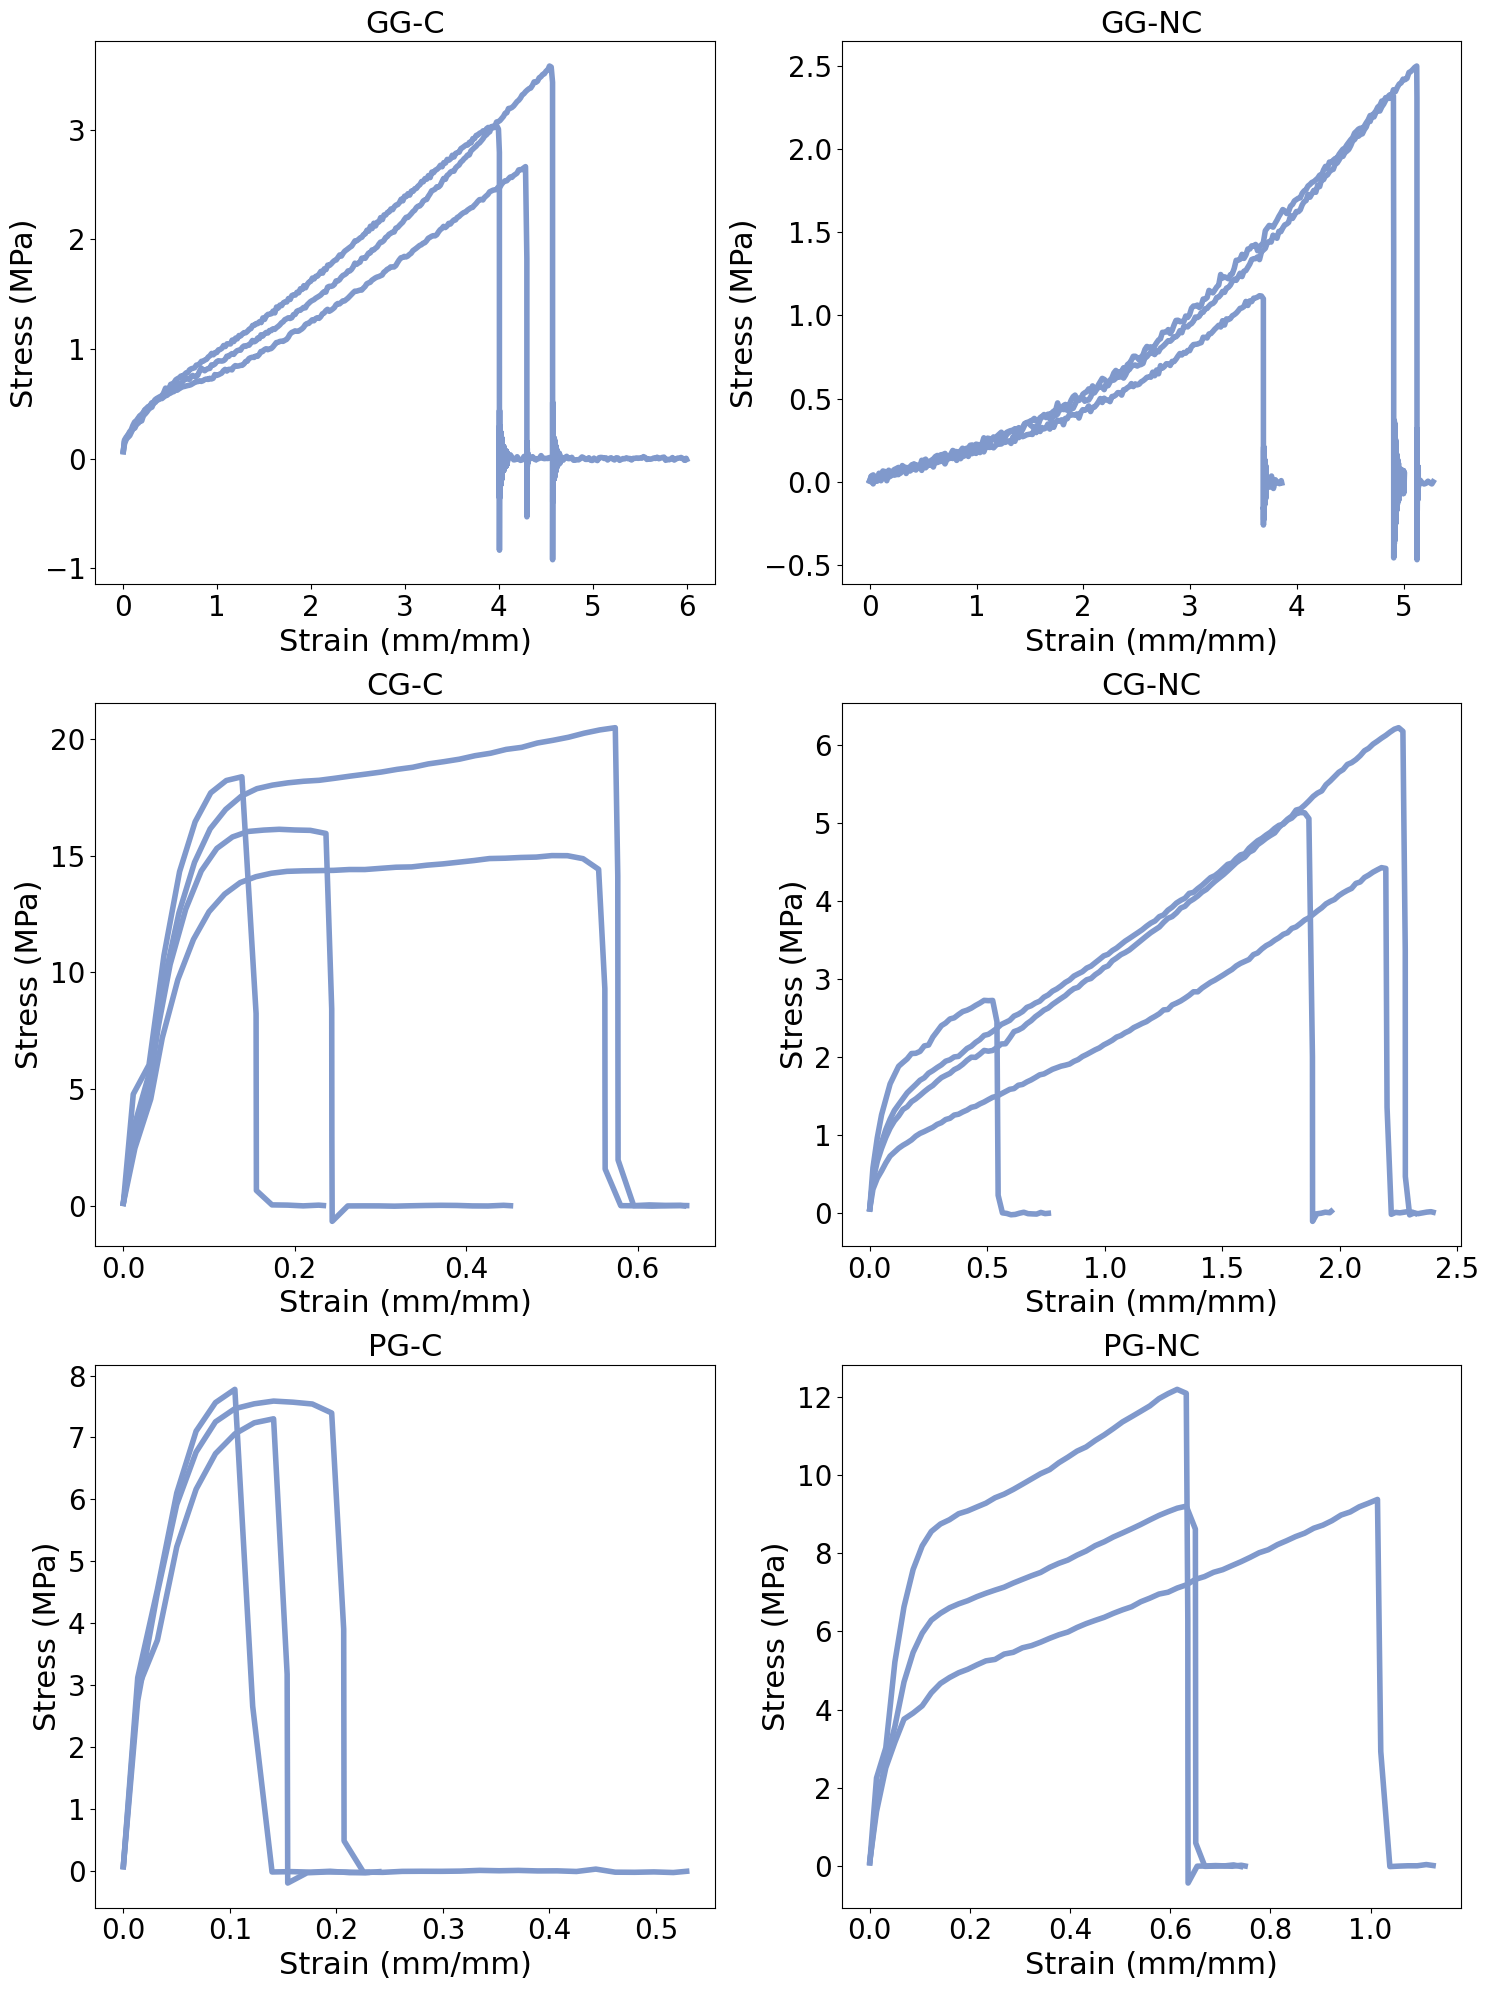

In [22]:
import matplotlib.pyplot as plt
import numpy as np
label_dict = {"pristine": "PG", "hmwg":"CG", "g60":"GG", "conductive":"C", "nonconductive":"NC"}
# Get unique combinations of specimen and conductivity
unique_combinations = combined_data.drop_duplicates(subset=['Specimen', 'Conductivity'])

# Setup the plot - assuming a 3x2 grid for 6 plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))
axes = axes.flatten()  # Flatten to make it easier to iterate over

for i, (index, row) in enumerate(unique_combinations.iterrows()):
    # Filter data for the current specimen and conductivity
    current_data = combined_data[(combined_data['Specimen'] == row['Specimen']) &
                                 (combined_data['Conductivity'] == row['Conductivity'])]
    
    # Plot stress vs. strain for each SampleNumber within this group
    for sample_number in np.sort(current_data['SampleNumber'].unique()):
        sample_data = current_data[current_data['SampleNumber'] == sample_number]
        axes[i].plot(sample_data['Strain'], sample_data['Stress'], label=f'Sample {sample_number}', color=(0.5, 0.6, 0.8), linewidth=4)
        
    axes[i].tick_params(labelsize=20)
    axes[i].set_title(f'{label_dict[row["Specimen"]]}-{label_dict[row["Conductivity"]]}', fontsize=22)
    axes[i].set_xlabel('Strain (mm/mm)', fontsize=22)
    axes[i].set_ylabel('Stress (MPa)', fontsize=22)
    #axes[i].legend(loc="upper left")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("bulk_stress_strain.pdf")
plt.show()
